In [2]:
import numpy as np
import pandas as pd


In [3]:
link = 'https://api-data.public-prod.qare.tech/test_data_science/'

df_new = pd.read_json(link)

In [4]:
df_new.shape

(5000, 5)

In [5]:
df_new.describe()

,physician_id,patient_id
count,5000.000000,5000.00000
mean,78.413200,2345.29340
std,37.901195,1350.22648
min,0.000000,0.00000
25%,56.000000,1182.75000
50%,80.000000,2342.50000
75%,104.000000,3508.25000
max,152.000000,4692.00000


In [6]:

df_new.tail()

,consultation_date,physician_id,patient_id,speciality,cim10
4995,2021-12-11T06:00:00,56,4688,general-practician,COVID-19
4996,2022-08-16T20:50:00,150,4689,general-practician,Fatigue [asthénie]
4997,2022-05-30T20:20:00,89,4690,general-practician,Varicelle
4998,2022-01-25T10:00:00,101,4691,general-practician,Gastro-entérite et colite toxiques
4999,2022-05-17T20:40:00,77,4692,general-practician,"Affection post-COVID-19, sans précision"


In [7]:
df_new.dtypes


consultation_date    object
physician_id          int64
patient_id            int64
speciality           object
cim10                object
dtype: object

# EDA


In [8]:
df_new.isnull().sum()

consultation_date    0
physician_id         0
patient_id           0
speciality           0
cim10                0
dtype: int64

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   consultation_date  5000 non-null   object
 1   physician_id       5000 non-null   int64 
 2   patient_id         5000 non-null   int64 
 3   speciality         5000 non-null   object
 4   cim10              5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [10]:
for col in df_new.columns:
    print('{} : {}'.format(col,df_new[col].unique()))
    

consultation_date : ['2022-04-07T09:20:00' '2021-10-01T12:00:00' '2022-05-04T20:40:00' ...
 '2022-08-16T20:50:00' '2022-01-25T10:00:00' '2022-05-17T20:40:00']
physician_id : [122  56  89 129  31  87  61  97   7  90  14 104  42 130  20 119   6  86
 134 143 102  81  64 141  92 100 139  43 150  29  77  35  69 112  44 144
 115  50  48  73  34 118 131   1   0  53  93  80  37  51  46 110   4  24
 123 132  30 137  23 124 128 117 140  25  40  58 145  52  98  33  27 133
  28   3 138  71  19 126  17 121  75  21  18  59 113  91  10  76 116  38
  99 142  84  74  22  41  82  62  45  26  63  72 149 114 105 127  66  15
  78 147 135  65 120  49  57  83 146  13  67   2 148  88  16 151  12 103
 101  11 125  54  60  47  68  95 108  70  55   5 107  36 152  94 106  79
   9  39 111   8  85 109 136  32  96]
patient_id : [   0    1    2 ... 4690 4691 4692]
speciality : ['general-practician']
cim10 : ['Grippe, à virus grippal saisonnier identifié' 'Sinusite aiguë'
 'Rhinopharyngite aiguë [rhume banal]' 'Autres

In [11]:
#for col in df_new.columns:
#    df_new[col].replace({'?':np.nan},inplace=True)
    
#df_new.tail()

<AxesSubplot:>

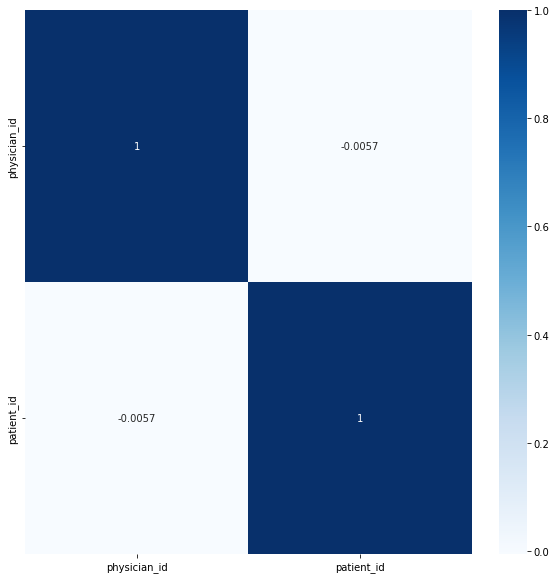

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot:xlabel='cim10', ylabel='Count'>

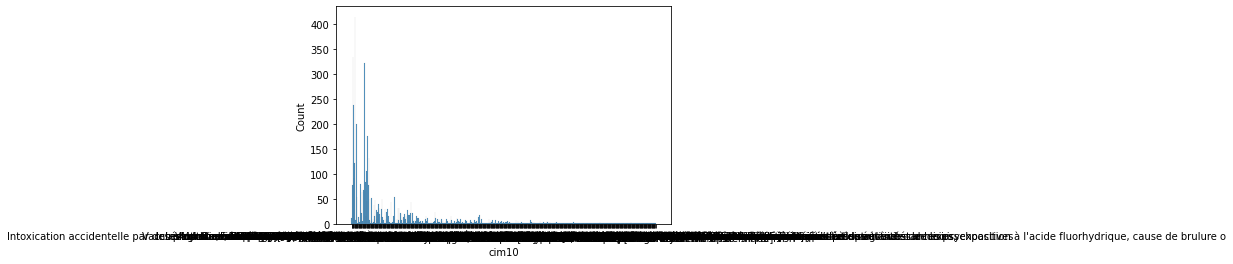

In [13]:
sns.histplot(df_new.cim10,bins=10)

Text(0, 0.5, 'physician_id')

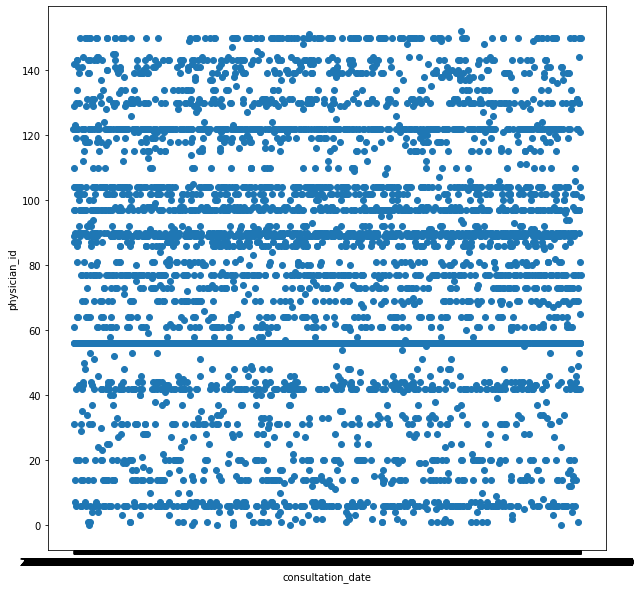

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x='consultation_date',y='physician_id',data=df_new)
plt.xlabel('consultation_date')
plt.ylabel('physician_id')

In [15]:
df_new.groupby(['physician_id','patient_id'])[['physician_id','patient_id']].count()

physician_id  patient_id
physician_id patient_id                          
0            141                    1           1
             1078                   1           1
             1296                   1           1
             1444                   1           1
             1959                   1           1
...                               ...         ...
150          4630                   1           1
             4671                   1           1
             4689                   1           1
151          2141                   1           1
152          3541                   1           1

[4931 rows x 2 columns]

In [16]:
df_new.groupby(['patient_id', 'physician_id'])[['patient_id', 'physician_id']].count()

,,patient_id,physician_id
patient_id,physician_id,,
0,122,1,1
1,56,1,1
2,89,1,1
3,129,1,1
4,31,1,1
...,...,...,...
4688,56,1,1
4689,150,1,1
4690,89,1,1


In [17]:
df_new.groupby(['speciality']).count()


,consultation_date,physician_id,patient_id,cim10
speciality,,,,
general-practician,5000,5000,5000,5000


In [18]:
df_new['speciality'].value_counts()

general-practician    5000
Name: speciality, dtype: int64

In [19]:
df_new.groupby(['patient_id']).count()

,consultation_date,physician_id,speciality,cim10
patient_id,,,,
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
4688,1,1,1,1
4689,1,1,1,1
4690,1,1,1,1


In [20]:
df_new['patient_id'].value_counts()

663     4
3364    4
1634    4
1197    3
395     3
       ..
1606    1
1607    1
1608    1
1609    1
4692    1
Name: patient_id, Length: 4693, dtype: int64

In [22]:
df_new['Dates'] = pd.to_datetime(df_new['consultation_date']).dt.date
df_new['Time'] = pd.to_datetime(df_new['consultation_date']).dt.time
df_new.tail()

,consultation_date,physician_id,patient_id,speciality,cim10,Dates,Time
4995,2021-12-11T06:00:00,56,4688,general-practician,COVID-19,2021-12-11,06:00:00
4996,2022-08-16T20:50:00,150,4689,general-practician,Fatigue [asthénie],2022-08-16,20:50:00
4997,2022-05-30T20:20:00,89,4690,general-practician,Varicelle,2022-05-30,20:20:00
4998,2022-01-25T10:00:00,101,4691,general-practician,Gastro-entérite et colite toxiques,2022-01-25,10:00:00
4999,2022-05-17T20:40:00,77,4692,general-practician,"Affection post-COVID-19, sans précision",2022-05-17,20:40:00


In [23]:
df_new['year'] = pd.DatetimeIndex(df_new['consultation_date']).year
df_new['year'].value_counts()
df_new['month'] = pd.DatetimeIndex(df_new['consultation_date']).month
df_new['month'].value_counts()
df_new['day'] = pd.DatetimeIndex(df_new['consultation_date']).day
df_new['day'].value_counts()
df_new

,consultation_date,physician_id,patient_id,speciality,cim10,Dates,Time,year,month,day
0,2022-04-07T09:20:00,122,0,general-practician,"Grippe, à virus grippal saisonnier identifié",2022-04-07,09:20:00,2022,4,7
1,2021-10-01T12:00:00,56,1,general-practician,Sinusite aiguë,2021-10-01,12:00:00,2021,10,1
2,2022-05-04T20:40:00,89,2,general-practician,Rhinopharyngite aiguë [rhume banal],2022-05-04,20:40:00,2022,5,4
3,2022-07-22T21:30:00,129,3,general-practician,Autres cystites,2022-07-22,21:30:00,2022,7,22
4,2021-01-06T07:10:00,31,4,general-practician,"Grippe, virus non identifié",2021-01-06,07:10:00,2021,1,6
...,...,...,...,...,...,...,...,...,...,...
4995,2021-12-11T06:00:00,56,4688,general-practician,COVID-19,2021-12-11,06:00:00,2021,12,11
4996,2022-08-16T20:50:00,150,4689,general-practician,Fatigue [asthénie],2022-08-16,20:50:00,2022,8,16
4997,2022-05-30T20:20:00,89,4690,general-practician,Varicelle,2022-05-30,20:20:00,2022,5,30
4998,2022-01-25T10:00:00,101,4691,general-practician,Gastro-entérite et colite toxiques,2022-01-25,10:00:00,2022,1,25


In [24]:
df_new['year'].value_counts()

2022    3272
2021    1728
Name: year, dtype: int64

In [25]:
df_new['month'].value_counts()

8     567
9     545
3     519
6     487
7     471
2     439
4     409
1     397
5     340
12    303
11    293
10    230
Name: month, dtype: int64

In [26]:
df_new['day'].value_counts()

7     204
4     187
2     186
16    184
10    178
29    176
9     175
8     174
27    174
28    173
12    171
20    171
30    168
11    165
5     165
14    165
19    162
15    161
3     157
21    157
24    157
13    156
23    154
6     154
1     152
25    150
17    142
18    140
22    139
26    130
31     73
Name: day, dtype: int64

In [27]:
#df_new['consultation_date'].to_datetime()
#df_new['consultation_date'].dt.isoweekday()

df_new['day_week'] = pd.DatetimeIndex(df_new['consultation_date']).day_name()
df_new['day_week'].value_counts()

Monday       981
Tuesday      830
Thursday     740
Friday       736
Wednesday    716
Saturday     581
Sunday       416
Name: day_week, dtype: int64